In [1]:
import numpy as np
import time
import pandas as pd
from pathlib import Path
from silhouette_upper_bound import upper_bound
from sklearn.metrics import pairwise_distances

In [2]:
# ============================================================
# CONFIGURATION
# ============================================================

OUTPUT_FILE = Path("runtime_results.csv")

# Dataset sizes to test
SIZES = [2000, 5000, 10000, 20000, 30000, 40000]   # adjust as needed
# Dimension of synthetic points
DIM = 32

# Number of repeats for averaging runtimes
REPEATS = 5

In [3]:
# ============================================================
# RUNTIME MEASUREMENT
# ============================================================
def measure_runtime(func, D, repeats=5):
    runtimes = []
    for _ in range(repeats):
        start = time.perf_counter()
        func(D)
        end = time.perf_counter()
        runtimes.append(end - start)

    return np.mean(runtimes), np.std(runtimes)

In [4]:
# ============================================================
# MAIN LOOP
# ============================================================
def run_experiments():
    results = []

    for n in SIZES:
        print(f"Running n={n} ...")

        # Synthetic Gaussian data
        X = np.random.randn(n, DIM).astype(np.float32)
        D = pairwise_distances(X, metric="euclidean")

        mean_rt, std_rt = measure_runtime(upper_bound, D, REPEATS)

        print(f"  mean runtime: {mean_rt:.4f}s   std: {std_rt:.4f}s")

        results.append({
            "n_samples": n,
            "dim": DIM,
            "repeats": REPEATS,
            "runtime_mean_sec": mean_rt,
            "runtime_std_sec": std_rt
        })

    df = pd.DataFrame(results)
    df.to_csv(OUTPUT_FILE, index=False)
    print(f"\nSaved results to: {OUTPUT_FILE.resolve()}")

    return df

In [5]:
run_experiments()

Running n=2000 ...
  mean runtime: 0.1477s   std: 0.1467s
Running n=5000 ...
  mean runtime: 0.7705s   std: 0.0269s
Running n=10000 ...
  mean runtime: 3.0651s   std: 0.1219s
Running n=20000 ...
  mean runtime: 12.9699s   std: 0.3361s
Running n=30000 ...
  mean runtime: 35.8261s   std: 2.9712s
Running n=40000 ...
  mean runtime: 243.1677s   std: 23.8926s

Saved results to: /Users/hugostrang/projects/silhouette-upper-bound/experiments/runtime_results.csv


,n_samples,dim,repeats,runtime_mean_sec,runtime_std_sec
0,2000,32,5,0.147666,0.146657
1,5000,32,5,0.770487,0.026901
2,10000,32,5,3.065135,0.121888
3,20000,32,5,12.969853,0.336068
4,30000,32,5,35.826084,2.971247
5,40000,32,5,243.167728,23.892608


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn provides better default styles and color palettes

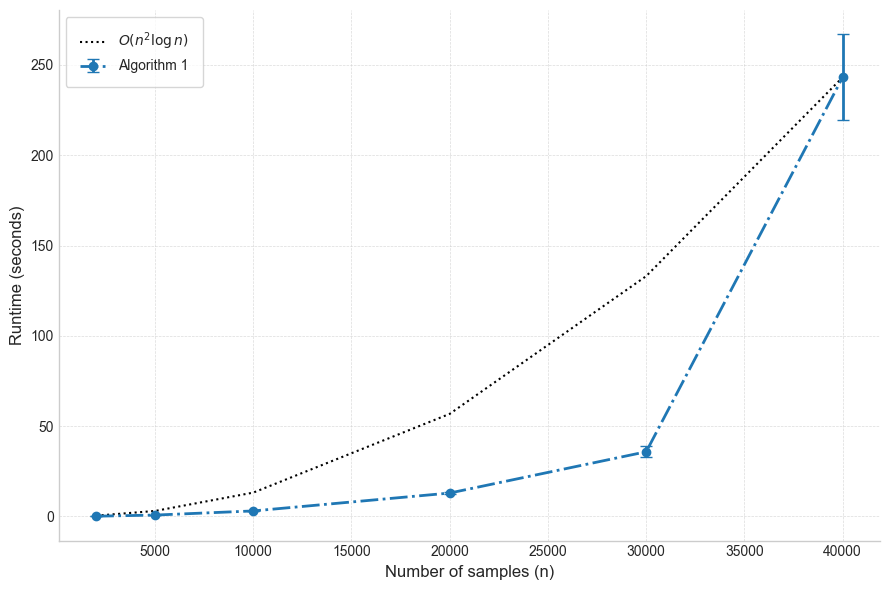

In [7]:
plt.style.use("seaborn-v0_8-whitegrid") 

# Load the saved results (adjust filename if needed)
df = pd.read_csv("runtime_results.csv")

fig, ax = plt.subplots(figsize=(9, 6))

# --- 1. Plot the actual experimental data WITH error bars ---
# Use capsize for the caps on the error bars
ax.errorbar(
    df["n_samples"], 
    df["runtime_mean_sec"], 
    yerr=df["runtime_std_sec"], 
    marker='o', 
    linestyle='-.', 
    color='#1f77b4', 
    linewidth=2, 
    markersize=6, 
    capsize=4,        # Adds horizontal caps to the error bars
    label='Algorithm 1'
)

# --- 2. Generate and plot the theoretical curve ---

n_values = df["n_samples"]
# Find a scaling factor (C) based on the last data point's mean runtime
last_n = n_values.iloc[-1]
last_runtime = df["runtime_mean_sec"].iloc[-1]
# C = Runtime / (n^2 * log(n))
scaling_factor = last_runtime / (last_n**2 * np.log(last_n))

# Calculate theoretical runtimes
theoretical_runtimes = scaling_factor * (n_values**2 * np.log(n_values))

ax.plot(n_values, theoretical_runtimes, linestyle=':', color='black', linewidth=1.5, label='$O(n^2 \log n)$')


# --- 3. Enhance Plot Aesthetics and Add Legend ---

ax.set_xlabel("Number of samples (n)", fontsize=12)
ax.set_ylabel("Runtime (seconds)", fontsize=12)
#ax.set_title("Algorithm Runtime: Empirical vs. Theoretical Complexity", fontsize=14, fontweight='bold')

ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Update the legend to reflect the mean +/- SD label
ax.legend(loc='upper left', frameon=True, shadow=False, borderpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.tight_layout()
plt.show()

In [12]:
from matplotlib.ticker import ScalarFormatter

In [18]:
plt.style.use("seaborn-v0_8-whitegrid") 

# Load the saved results (adjust filename if needed)
df = pd.read_csv("runtime_results.csv")

fig, ax = plt.subplots(figsize=(9, 6))

# --- 1. Plot the actual experimental data WITH error bars ---
# Use capsize for the caps on the error bars
ax.errorbar(
    df["n_samples"], 
    df["runtime_mean_sec"], 
    yerr=df["runtime_std_sec"], 
    marker='o', 
    linestyle='-.', 
    color='#1f77b4', 
    linewidth=2, 
    markersize=6, 
    capsize=4,        # Adds horizontal caps to the error bars
    label='Algorithm 1'
)

# --- 2. Generate and plot the theoretical curve ---

n_values = df["n_samples"]
# Find a scaling factor (C) based on the last data point's mean runtime
last_n = n_values.iloc[-1]
last_runtime = df["runtime_mean_sec"].iloc[-1]
# C = Runtime / (n^2 * log(n))
scaling_factor = last_runtime / (last_n**2 * np.log(last_n))

# Calculate theoretical runtimes
theoretical_runtimes = scaling_factor * (n_values**2 * np.log(n_values))

ax.semilogx(n_values, theoretical_runtimes, linestyle=':', color='black', linewidth=1.5, label='$O(n^2 \log n)$')


# --- 3. Enhance Plot Aesthetics and Add Legend ---

ax.set_xlabel("Number of samples (n)", fontsize=14)
ax.set_ylabel("Runtime (seconds)", fontsize=14)

ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Update the legend to reflect the mean +/- SD label
ax.legend(loc='upper left', frameon=True, shadow=False, borderpad=1, fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks(df["n_samples"].values) 

# Optional: Rotate the labels if they overlap after adding more ticks
ax.tick_params(axis='x', rotation=45) 

ax.tick_params(axis='both', which='major', labelsize=14)

# Reformat the labels to avoid scientific notation if preferred (optional)
ax.get_xaxis().set_major_formatter(ScalarFormatter())

plt.tight_layout()
plt.savefig("runtime.pdf", bbox_inches="tight")
plt.close()